In [1]:
import torch as th
import torch.nn as nn
import torch.nn.functional as F
import syft as sy
from syft.frameworks.torch.crypto.securenn import relu_deriv, private_compare, relu, decompose
sy.create_sandbox(globals(), verbose=False, download_data=False)
import torch
import syft
james = jason

Setting up Sandbox...
Done!


In [5]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [242]:
secret_field = 100
noise_field = 10000
field = noise_field * secret_field + 2 * noise_field

In [243]:
secret = randint(1, secret_field)
n1 = randint(1, noise_field)
n2 = randint(1, noise_field)
n3 = randint(-noise_field, noise_field)
pk = secret * n1 * n2 + n3

In [244]:
pk

23004149

In [245]:
store = {}
def get_divisors(n):
    if n in store.keys():
        return store[n]
    
    r = list(get_divisors_(n))
    store[n] = r
    return r

def get_divisors_(n):
    # get factors and their counts
    factors = {}
    nn = n
    i = 2
    while i*i <= nn:
        while nn % i == 0:
            factors[i] = factors.get(i, 0) + 1
            nn //= i
        i += 1
    if nn > 1:
        factors[nn] = factors.get(nn, 0) + 1

    primes = list(factors.keys())

    # generates factors from primes[k:] subset
    def generate(k):
        if k == len(primes):
            yield 1
        else:
            rest = generate(k+1)
            prime = primes[k]
            for factor in rest:
                prime_to_i = 1
                # prime_to_i iterates prime**i values, i being all possible exponents
                for _ in range(factors[prime] + 1):
                    yield factor * prime_to_i
                    prime_to_i *= prime

    # in python3, `yield from generate(0)` would also work
    for factor in generate(0):
        yield factor
    

In [246]:
def get_pk():
    secret = randint(1, secret_field)
    n1 = randint(1, noise_field)
    n2 = randint(1, noise_field)
    n3 = randint(-noise_field, noise_field)
    pk = secret * n1 * n2 + n3
    return secret, pk

In [247]:
def get_least_non_div():
    _sk, pk = get_pk()
    print(_sk)
    pk = abs(pk)
    print(pk)
    divisors = []
    lb, hb = (pk - int(noise_field), pk + int(noise_field))
    for sk in range(1, secret_field):
        for n1 in range(1, noise_field):
            sk_n1 = sk * n1
            for n2 in range(n1, noise_field):
                p = sk_n1 * n2
                if p >= lb:
                    if p <= hb:
                        divisors += [sk, n1, n2]
                    else:
                        break

    divisors = sorted(list(set(divisors)))
    missing = []
    for i in range(secret_field):
        if i not in divisors:
            missing.append(i)
        
    return missing

In [248]:
%%time
get_least_non_div()

46
1380920863
CPU times: user 3min 5s, sys: 248 ms, total: 3min 6s
Wall time: 3min 6s


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [226]:
get_pk()

(226, 92334379)

In [45]:
%%time
l = [get_least_non_div() for i in range(300)]

CPU times: user 21.1 s, sys: 128 ms, total: 21.2 s
Wall time: 21.2 s


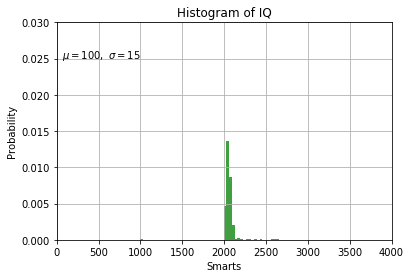

In [33]:
# the histogram of the data
n, bins, patches = plt.hist(l, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([0, 4000, 0, 0.03])
plt.grid(True)
plt.show()

In [249]:
neg = 0
sks = []
for i in range(1000000):
    sk, pk = get_pk()
    if pk < 0:
        neg += 1
        sks.append(sk)
        
print(neg)

6


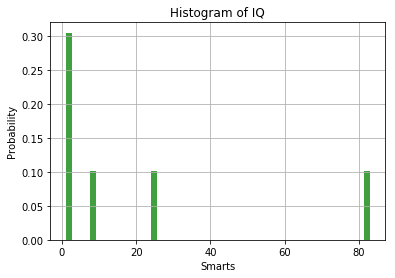

In [250]:
# the histogram of the data
n, bins, patches = plt.hist(sks, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.grid(True)
plt.show()

In [3]:
import numpy as np

In [19]:
def evaluate(v, f, F):
    return 1./2 * v * (
        2
        - np.log(F) *(
            -2 
            - 2 * np.log(f) 
            + np.log(F) 
            + 2 * np.log(v/F**2)
        ) 
        + (
            -2 + 
            np.log(v/(f * F))
        ) * np.log(v/(f * F))
    ) / (f * F * F)

In [56]:
f = 2**16
F = 2**32
print("Proba of product under F * F limit (good case)", round(100*evaluate(F*F, f, F), 2), "%")
print("Proba of product under F * F * 0.1 * f limit (good case)", round(100*evaluate(F*F* 0.1 * f, f, F), 2), "%")
vr = np.arange(1, f * F * F, (f * F * F)/200)
y = [evaluate(x, f, F) for x in vr]
len(y)

Proba of product under F * F limit (good case) 0.11 %
Proba of product under F * F * 0.1 * f limit (good case) 59.54 %


200

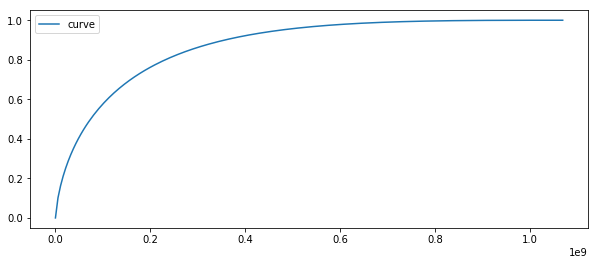

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.plot(vr, y, label="curve")
plt.legend()
plt.show()

In [22]:
evaluate(F*F, f, F)

0.08562372613227343

In [57]:
7 * 61 * 72

30744